# Project - Anomaly detection on CPU usage 

- Anomaly Detection means to identify unexpected events in a process. It means to detect threats to our systems that may cause harm in terms of security and leakage of important information, but the importance of Anomaly Detection is not limited to security. 
- The data of this project is based on per-minute metrics of the host’s CPU utilization.
 

In [1]:
!pip install -r '../requirements.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 142.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 124.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 146.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 136.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 kB 117.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 158.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 170.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 145.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 44.4 MB/s eta 0:00:000

## Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Load Data

In [3]:
#download from https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/

train_dataA = pd.read_csv('../data/raw/cpu-train-a.csv')
test_dataA = pd.read_csv('../data/raw/cpu-test-a.csv')

In [ ]:
train_dataB = pd.read_csv('../data/raw/cpu-train-b.csv')
test_dataB = pd.read_csv('../data/raw/cpu-test-b.csv')

In [4]:
print('Shape A: ', train_dataA.shape)
print('Shape B: ', train_dataB.shape)

Shape A:  (420, 2)
Shape B:  (600, 2)


In [5]:
print('Shape A: ', test_dataA.shape)
print('Shape B: ', test_dataB.shape)

Shape A:  (60, 2)
Shape B:  (60, 2)


In [6]:
train_dataA.head(10)

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08
5,2017-01-27 18:47:00,1.08
6,2017-01-27 18:48:00,1.15
7,2017-01-27 18:49:00,1.13
8,2017-01-27 18:50:00,1.09
9,2017-01-27 18:51:00,1.06


In [7]:
train_dataA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  420 non-null    object 
 1   cpu       420 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [8]:
train_dataB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  600 non-null    object 
 1   cpu       600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


## Explorer Train_Data_A

In [9]:
#Convert the dataframe index to a datetime index 
df_raw = train_dataA.copy()
df_raw['date'] = pd.to_datetime(df_raw['datetime'])
df_raw = df_raw.set_index('date')
df_raw.drop(['datetime'], axis=1, inplace=True)

#Convert the dataframe index to a datetime index 
df_test = test_dataA.copy()
df_test['date'] = pd.to_datetime(df_test['datetime'])
df_test = df_test.set_index('date')
df_test.drop(['datetime'], axis=1, inplace=True) 

df_raw.head()

,cpu
date,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [10]:
df_raw.resample('D').mean()

,cpu
date,
2017-01-27,1.142579
2017-01-28,1.515980


In [11]:
df_test.resample('D').mean()

,cpu
date,
2017-01-28,1.2715


In [12]:
#2 day data, 1 min interval

In [13]:
import cufflinks as cf
import plotly.offline as py
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'CPU 27-28 jun 2017'}, xlabel='date'>

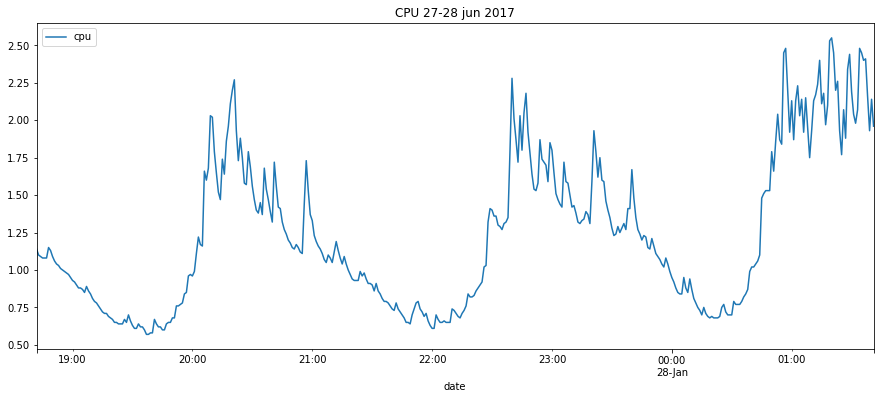

In [14]:
df_raw.plot(title="CPU 27-28 jun 2017", figsize=(15,6))

- Visualize a cycle of 120 minute aprox.

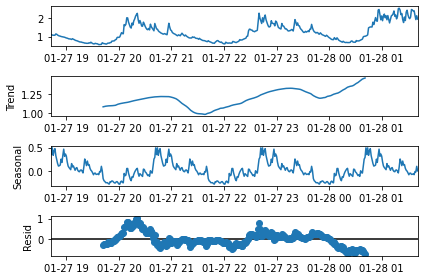

In [19]:
#rcParams['figure.figsize'] = 11, 9
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_raw,model='additive',period=120) # 2 hours period, the datetime is in minutes
fig = decomposition.plot()
plt.show()

## Model ARIMA Train_A

In [21]:
from pmdarima.arima import auto_arima
"""
stepwise_model = auto_arima(df_raw, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=48,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())¨
"""

"\nstepwise_model = auto_arima(df_raw, start_p=1, start_q=1,\n                           max_p=3, max_q=3, m=48,\n                           start_P=0, seasonal=True,\n                           d=1, D=1, trace=True,\n                           error_action='ignore',  \n                           suppress_warnings=True, \n                           stepwise=True)\nprint(stepwise_model.aic())¨\n"

In [29]:
stepwise_model2 = auto_arima(df_raw, start_p=1, start_q=1,
                           max_p=1, max_q=1, m=60,
                           start_P=0, seasonal=True,
                           d=1, D=1,max_P=1,max_Q=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=45)
print(stepwise_model2.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[60]             : AIC=inf, Time=537.69 sec
 ARIMA(0,1,0)(0,1,0)[60]             : AIC=-259.144, Time=1.50 sec
 ARIMA(1,1,0)(1,1,0)[60]             : AIC=-311.570, Time=60.79 sec
 ARIMA(0,1,1)(0,1,1)[60]             : AIC=inf, Time=403.81 sec
 ARIMA(1,1,0)(0,1,0)[60]             : AIC=-257.255, Time=1.10 sec
 ARIMA(1,1,0)(1,1,1)[60]             : AIC=inf, Time=585.41 sec
 ARIMA(1,1,0)(0,1,1)[60]             : AIC=inf, Time=111.69 sec
 ARIMA(0,1,0)(1,1,0)[60]             : AIC=-313.517, Time=19.41 sec
 ARIMA(0,1,0)(1,1,1)[60]             : AIC=inf, Time=173.61 sec
 ARIMA(0,1,0)(0,1,1)[60]             : AIC=inf, Time=126.30 sec
 ARIMA(0,1,1)(1,1,0)[60]             : AIC=-311.587, Time=102.77 sec
 ARIMA(1,1,1)(1,1,0)[60]             : AIC=-315.757, Time=140.90 sec
 ARIMA(1,1,1)(0,1,0)[60]             : AIC=-262.053, Time=2.63 sec
 ARIMA(1,1,1)(1,1,1)[60]             : AIC=inf, Time=330.28 sec
 ARIMA(1,1,1)(1,1,0)[60] intercept

In [22]:
stepwise_model = auto_arima(df_raw, start_p=1, start_q=1,
                           max_p=1, max_q=1, m=60*2,
                           start_P=0, seasonal=True,
                           d=1, D=1,max_P=1,max_Q=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=45)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[120]             : AIC=inf, Time=285.46 sec
 ARIMA(0,1,0)(0,1,0)[120]             : AIC=-187.268, Time=12.78 sec
 ARIMA(1,1,0)(1,1,0)[120]             : AIC=inf, Time=130.42 sec
 ARIMA(0,1,1)(0,1,1)[120]             : AIC=inf, Time=267.82 sec
 ARIMA(0,1,0)(1,1,0)[120]             : AIC=inf, Time=83.27 sec
 ARIMA(0,1,0)(0,1,1)[120]             : AIC=inf, Time=192.09 sec
 ARIMA(0,1,0)(1,1,1)[120]             : AIC=inf, Time=154.52 sec
 ARIMA(1,1,0)(0,1,0)[120]             : AIC=-185.492, Time=14.79 sec
 ARIMA(0,1,1)(0,1,0)[120]             : AIC=-185.580, Time=13.83 sec
 ARIMA(1,1,1)(0,1,0)[120]             : AIC=-189.254, Time=32.49 sec
 ARIMA(1,1,1)(1,1,0)[120]             : AIC=-241.022, Time=159.97 sec
 ARIMA(1,1,1)(1,1,1)[120]             : AIC=inf, Time=422.69 sec
 ARIMA(0,1,1)(1,1,0)[120]             : AIC=-239.632, Time=154.21 sec
 ARIMA(1,1,1)(1,1,0)[120] intercept   : AIC=-239.067, Time=308.41 sec

Best model:  ARI

In [23]:
# Train the model
stepwise_model.fit(df_raw)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 120),
      suppress_warnings=True, with_intercept=False)

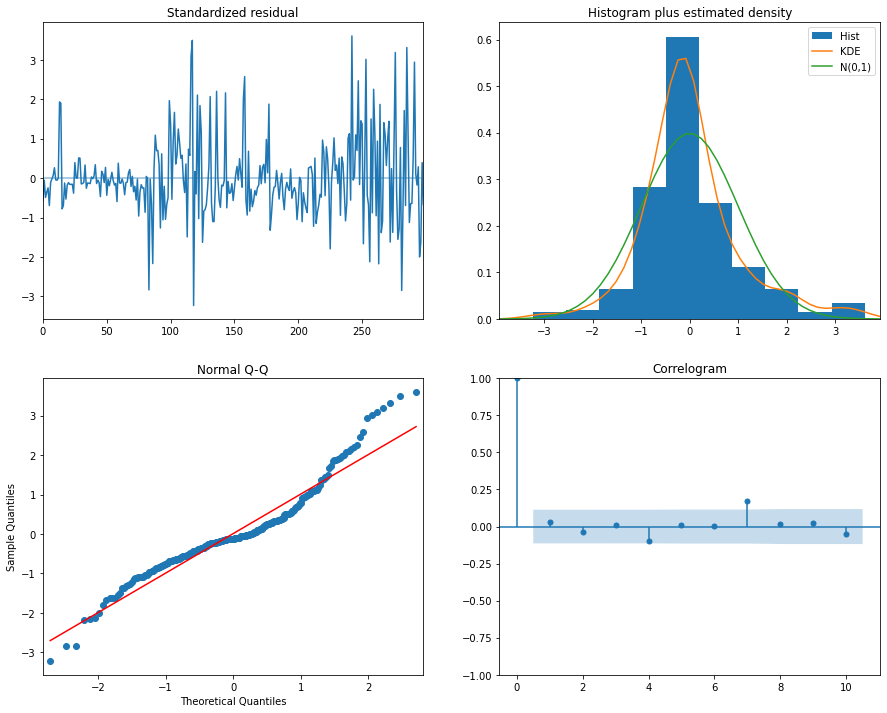

In [24]:
#The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
stepwise_model.fit(df_raw).plot_diagnostics(figsize=(15, 12))
plt.show()

<AxesSubplot:xlabel='date'>

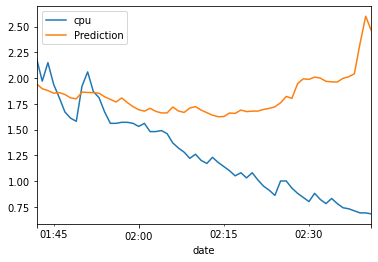

In [27]:
future_forecast = stepwise_model.predict(n_periods=60)

future_forecast = pd.DataFrame(future_forecast,index = df_test.index,columns=['Prediction'])
pd.concat([df_test,future_forecast],axis=1).plot()

In [ ]:
import pmdarima as pm

In [28]:
# Fit two different ARIMAs
m1 = pm.auto_arima(df_raw, error_action='ignore', seasonal=True, m=120)
m12 = pm.auto_arima(df_raw, error_action='ignore', seasonal=True, m=12)

NameError: name 'pm' is not defined

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
x = np.arange(df_test.shape[0])

# Plot m=1
axes[0].scatter(x, df_test, marker='x')
axes[0].plot(x, m1.predict(n_periods=df_test.shape[0]))
axes[0].set_title('Test samples vs. forecasts (m=1)')

# Plot m=12
axes[1].scatter(x, df_test, marker='x')
axes[1].plot(x, m12.predict(n_periods=df_test.shape[0]))
axes[1].set_title('Test samples vs. forecasts (m=12)')

plt.show()